In [205]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
from sklearn.impute import SimpleImputer
import warnings
warnings.filterwarnings('ignore')

In [206]:
# Set visualization style
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)

In [207]:
print("=" * 80)
print("DATA CLEANING & PREPROCESSING PIPELINE")
print("=" * 80)

DATA CLEANING & PREPROCESSING PIPELINE


# ============================================================================
# STEP 1: LOAD AND EXPLORE THE DATASET
# ============================================================================

In [208]:
print("\n[STEP 1] Loading and Exploring Dataset...")
print("-" * 80)


[STEP 1] Loading and Exploring Dataset...
--------------------------------------------------------------------------------


In [209]:
#!pip install kagglehub

In [210]:
# Load dataset
df = pd.read_csv("titanic-dataset.csv")

In [211]:
# Basic dataset information

print("\n1.1 Dataset Shape:", df.shape)
print(f"    Rows: {df.shape[0]}, Columns: {df.shape[1]}")



1.1 Dataset Shape: (891, 12)
    Rows: 891, Columns: 12


In [212]:
print("\n1.2 First 5 Rows:")
display(df.head())


1.2 First 5 Rows:


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [213]:
print("\n1.3 Dataset Info:")
print(df.info())


1.3 Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


In [214]:
print("\n1.4 Statistical Summary:")
print(df.describe())


1.4 Statistical Summary:
       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  


### Some key observations:

The average passenger age was around 29, indicating relatively higher youngsters compared to senior citizens.
The average Fare was 33 while maximum Fare was around 512 indicating a significant outlier, indicating that Fare was probably divided based on different packages.

In [219]:
print("\n1.5 Missing Values:")

missing_data = pd.DataFrame({
    'Column': df.columns,
    'Missing_Count': df.isnull().sum(),
    'Missing_Percentage': (df.isnull().sum() / len(df) * 100).round(2)
})

missing_data = missing_data[missing_data['Missing_Count'] > 0].sort_values('Missing_Count', ascending=False)
print(missing_data)


1.5 Missing Values:
            Column  Missing_Count  Missing_Percentage
Cabin        Cabin            687               77.10
Age            Age            177               19.87
Embarked  Embarked              2                0.22


In [220]:
print("\n1.6 Data Types:")
print(df.dtypes)


1.6 Data Types:
PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object


# ============================================================================
# STEP 2: HANDLE MISSING VALUES
# ============================================================================

In [221]:
# Create a copy for preprocessing
df_processed = df.copy()

In [222]:
# 2.1 Handle Age (numerical) - Use median imputation
print("\n2.1 Age Column:")
print(f"    Missing before: {df_processed['Age'].isnull().sum()}")
age_median = df_processed['Age'].median()
df_processed['Age'].fillna(age_median, inplace=True)
print(f"    Filled with median: {age_median:.2f}")
print(f"    Missing after: {df_processed['Age'].isnull().sum()}")


2.1 Age Column:
    Missing before: 177
    Filled with median: 28.00
    Missing after: 0


In [223]:
# 2.2 Handle Embarked (categorical) - Use mode imputation
print("\n2.2 Embarked Column:")
print(f"    Missing before: {df_processed['Embarked'].isnull().sum()}")
embarked_mode = df_processed['Embarked'].mode()[0]
df_processed['Embarked'].fillna(embarked_mode, inplace=True)
print(f"    Filled with mode: {embarked_mode}")
print(f"    Missing after: {df_processed['Embarked'].isnull().sum()}")


2.2 Embarked Column:
    Missing before: 2
    Filled with mode: S
    Missing after: 0


In [224]:
# 2.3 Handle Cabin - Drop due to high missing percentage
print("\n2.3 Cabin Column:")
print(f"    Missing percentage: {(df_processed['Cabin'].isnull().sum() / len(df_processed) * 100):.2f}%")
print("    Decision: Dropping column due to >70% missing values")
df_processed.drop('Cabin', axis=1, inplace=True)


2.3 Cabin Column:
    Missing percentage: 77.10%
    Decision: Dropping column due to >70% missing values


In [225]:
# 2.4 Verify no missing values remain
print("\n2.4 Verification - Total Missing Values:", df_processed.isnull().sum().sum())


2.4 Verification - Total Missing Values: 0


# ============================================================================
# STEP 3: ENCODE CATEGORICAL VARIABLES
# ============================================================================

In [226]:
print("\n\n[STEP 3] Encoding Categorical Variables...")
print("-" * 80)



[STEP 3] Encoding Categorical Variables...
--------------------------------------------------------------------------------


In [227]:
# 3.1 Identify categorical columns
categorical_cols = df_processed.select_dtypes(include=['object']).columns.tolist()
categorical_cols.remove('Name')  # Remove Name as it's not useful for ML
categorical_cols.remove('Ticket')  # Remove Ticket as it's not useful for ML
print(f"\n3.1 Categorical columns to encode: {categorical_cols}")


3.1 Categorical columns to encode: ['Sex', 'Embarked']


In [228]:
# 3.2 Label Encoding for binary categorical variable (Sex)
print("\n3.2 Label Encoding for 'Sex':")
label_encoder = LabelEncoder()
df_processed['Sex_Encoded'] = label_encoder.fit_transform(df_processed['Sex'])
print(f"    Mapping: {dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))}")
print(df_processed[['Sex', 'Sex_Encoded']].head())


3.2 Label Encoding for 'Sex':
    Mapping: {'female': 0, 'male': 1}
      Sex  Sex_Encoded
0    male            1
1  female            0
2  female            0
3  female            0
4    male            1


In [229]:
# 3.3 One-Hot Encoding for multi-class categorical variable (Embarked)

print("\n3.3 One-Hot Encoding for 'Embarked':")
embarked_dummies = pd.get_dummies(df_processed['Embarked'], prefix='Embarked', drop_first=True)
df_processed = pd.concat([df_processed, embarked_dummies], axis=1)
print(f"    New columns created: {embarked_dummies.columns.tolist()}")
print(df_processed[['Embarked'] + embarked_dummies.columns.tolist()].head())


3.3 One-Hot Encoding for 'Embarked':
    New columns created: ['Embarked_Q', 'Embarked_S']
  Embarked  Embarked_Q  Embarked_S
0        S       False        True
1        C       False       False
2        S       False        True
3        S       False        True
4        S       False        True


In [230]:
# Drop original categorical columns (except for reference)
df_processed.drop(['Sex', 'Embarked'], axis=1, inplace=True)

# ============================================================================
# STEP 4: FEATURE SCALING (NORMALIZATION & STANDARDIZATION)
# ============================================================================

In [231]:
print("\n\n[STEP 4] Feature Scaling...")
print("-" * 80)



[STEP 4] Feature Scaling...
--------------------------------------------------------------------------------


In [232]:
# Select numerical features for scaling
numerical_features = ['Age', 'Fare', 'SibSp', 'Parch']

In [233]:
print("\n4.1 Original Numerical Features Statistics:")
print(df_processed[numerical_features].describe())


4.1 Original Numerical Features Statistics:
              Age        Fare       SibSp       Parch
count  891.000000  891.000000  891.000000  891.000000
mean    29.361582   32.204208    0.523008    0.381594
std     13.019697   49.693429    1.102743    0.806057
min      0.420000    0.000000    0.000000    0.000000
25%     22.000000    7.910400    0.000000    0.000000
50%     28.000000   14.454200    0.000000    0.000000
75%     35.000000   31.000000    1.000000    0.000000
max     80.000000  512.329200    8.000000    6.000000


In [234]:
# 4.2 Standardization (Z-score normalization)
print("\n4.2 Standardization (Mean=0, Std=1):")
scaler_standard = StandardScaler()
df_processed[['Age_Standardized', 'Fare_Standardized']] = scaler_standard.fit_transform(
    df_processed[['Age', 'Fare']]
)
print("    Applied to: Age, Fare")
print(df_processed[['Age', 'Age_Standardized', 'Fare', 'Fare_Standardized']].head())



4.2 Standardization (Mean=0, Std=1):
    Applied to: Age, Fare
    Age  Age_Standardized     Fare  Fare_Standardized
0  22.0         -0.565736   7.2500          -0.502445
1  38.0          0.663861  71.2833           0.786845
2  26.0         -0.258337   7.9250          -0.488854
3  35.0          0.433312  53.1000           0.420730
4  35.0          0.433312   8.0500          -0.486337


In [235]:
# 4.3 Normalization (Min-Max scaling)
print("\n4.3 Normalization (Range 0-1):")
scaler_minmax = MinMaxScaler()
df_processed[['Age_Normalized', 'Fare_Normalized']] = scaler_minmax.fit_transform(
    df_processed[['Age', 'Fare']]
)
print("    Applied to: Age, Fare")
print(df_processed[['Age', 'Age_Normalized', 'Fare', 'Fare_Normalized']].head())


4.3 Normalization (Range 0-1):
    Applied to: Age, Fare
    Age  Age_Normalized     Fare  Fare_Normalized
0  22.0        0.271174   7.2500         0.014151
1  38.0        0.472229  71.2833         0.139136
2  26.0        0.321438   7.9250         0.015469
3  35.0        0.434531  53.1000         0.103644
4  35.0        0.434531   8.0500         0.015713


In [236]:
print("\n4.4 Scaled Features Statistics:")
print(df_processed[['Age_Standardized', 'Fare_Standardized', 'Age_Normalized', 'Fare_Normalized']].describe())


4.4 Scaled Features Statistics:
       Age_Standardized  Fare_Standardized  Age_Normalized  Fare_Normalized
count      8.910000e+02       8.910000e+02      891.000000       891.000000
mean       2.272780e-16       3.987333e-18        0.363679         0.062858
std        1.000562e+00       1.000562e+00        0.163605         0.096995
min       -2.224156e+00      -6.484217e-01        0.000000         0.000000
25%       -5.657365e-01      -4.891482e-01        0.271174         0.015440
50%       -1.046374e-01      -3.573909e-01        0.346569         0.028213
75%        4.333115e-01      -2.424635e-02        0.434531         0.060508
max        3.891554e+00       9.667167e+00        1.000000         1.000000


# ============================================================================
# STEP 5: OUTLIER DETECTION AND REMOVAL
# ============================================================================

In [237]:
print("\n\n[STEP 5] Outlier Detection and Removal...")
print("-" * 80)



[STEP 5] Outlier Detection and Removal...
--------------------------------------------------------------------------------


In [238]:
# 5.1 Detect outliers using IQR method
def detect_outliers_iqr(data, column):
    """Detect outliers using Interquartile Range (IQR) method"""
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return outliers, lower_bound, upper_bound

print("\n5.1 Outlier Detection for 'Fare':")
outliers_fare, lower_fare, upper_fare = detect_outliers_iqr(df_processed, 'Fare')
print(f"    Lower Bound: {lower_fare:.2f}")
print(f"    Upper Bound: {upper_fare:.2f}")
print(f"    Number of outliers: {len(outliers_fare)} ({len(outliers_fare)/len(df_processed)*100:.2f}%)")


5.1 Outlier Detection for 'Fare':
    Lower Bound: -26.72
    Upper Bound: 65.63
    Number of outliers: 116 (13.02%)


In [239]:
print("\n5.2 Outlier Detection for 'Age':")
outliers_age, lower_age, upper_age = detect_outliers_iqr(df_processed, 'Age')
print(f"    Lower Bound: {lower_age:.2f}")
print(f"    Upper Bound: {upper_age:.2f}")
print(f"    Number of outliers: {len(outliers_age)} ({len(outliers_age)/len(df_processed)*100:.2f}%)")


5.2 Outlier Detection for 'Age':
    Lower Bound: 2.50
    Upper Bound: 54.50
    Number of outliers: 66 (7.41%)


In [255]:
# 5.3 Remove outliers
print("\n5.3 Removing Outliers:")
df_no_outliers = df_processed[
    (df_processed['Fare'] >= lower_fare) & 
    (df_processed['Fare'] <= upper_fare) &
    (df_processed['Age'] >= lower_age) & 
    (df_processed['Age'] <= upper_age)
].copy()
print(f"    Rows before: {len(df_processed)}")
print(f"    Rows after: {len(df_no_outliers)}")
print(f"    Rows removed: {len(df_processed) - len(df_no_outliers)}")


5.3 Removing Outliers:
    Rows before: 891
    Rows after: 721
    Rows removed: 170


### ✅ Final Cleaned Dataset

In [242]:
print(df.head())
print(df.shape)

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  
(8

# ============================================================================
# STEP 6: CREATE VISUALIZATIONS
# ============================================================================

In [243]:
print("\n\n[STEP 6] Creating Visualizations...")
print("-" * 80)



[STEP 6] Creating Visualizations...
--------------------------------------------------------------------------------


Let's check for correlation between features for some better insights

<Figure size 1000x800 with 0 Axes>

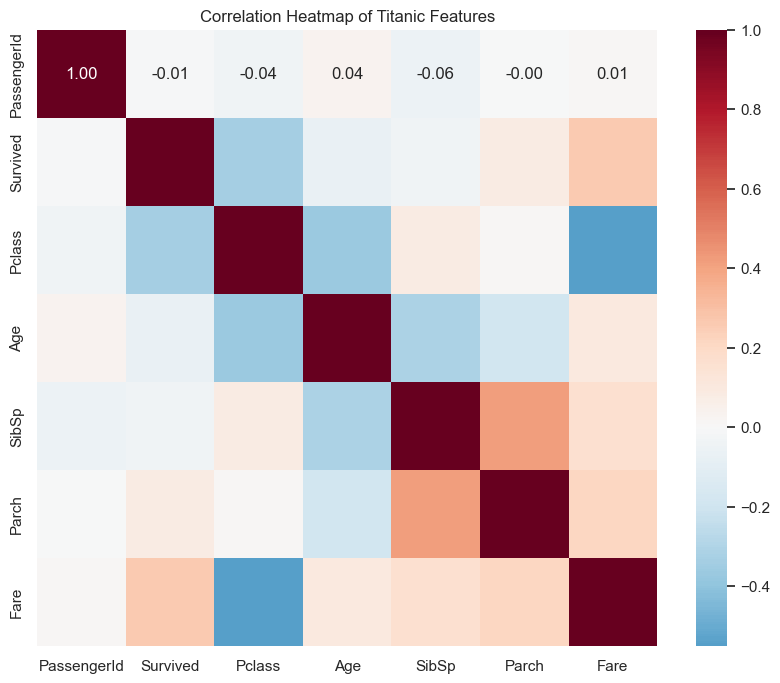

In [245]:
plt.figure(figsize=(10, 8))

# 1. Compute correlation matrix
corr_matrix = df.corr(numeric_only=True)

# 2. Create the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='RdBu_r', center=0, fmt='.2f')

plt.title('Correlation Heatmap of Titanic Features')
plt.show()

### Key Insights:

Since the dataset labels Males : 0 and Females : 1 => Females had higher surival rate than males =>Survived and Sex are positively correlated (0.40)

Also, we notice that Fare and Pclass are negatively correlated(-0.56) =>First Class or the luxury Class paid much higher fares compared to other passenger classes

Age and Pclass also had a negative correlation (-0.38), indicating higher age groups tend to be in the luxury or first class Probably, having enough financial assets to afford luxury class compared to youngsters

Pclass and Survived also shows a negative correlation (-0.24), indicating first or luxury class was given priority in rescue operation

#### Overall we can deduce that females and First class were given priority during rescue operation

### 6.1 Univariate Analysis

#### Survival Distribution

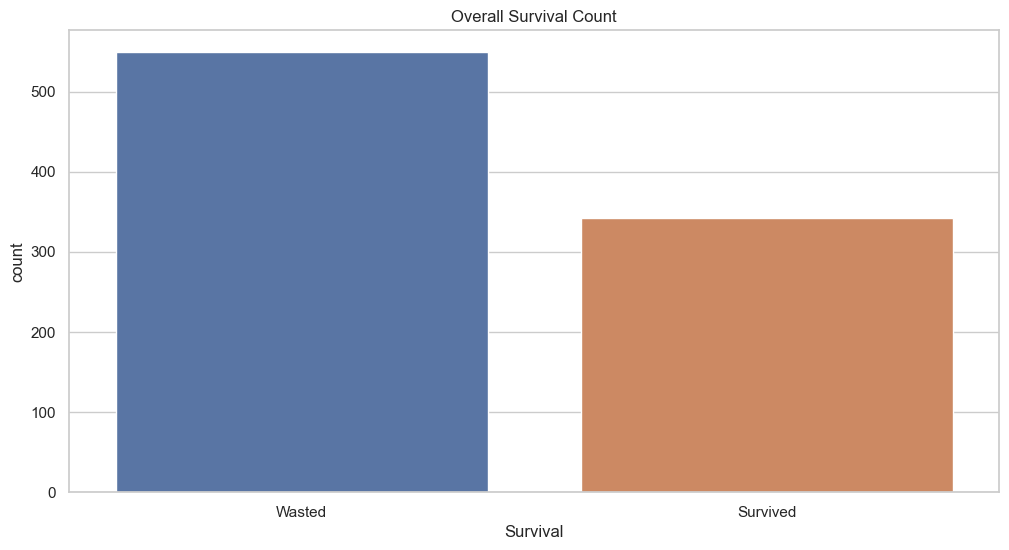

In [259]:
data=df['Survived'].value_counts()
sns.countplot(x=df['Survived'],data=df)

new_labels = ['Wasted', 'Survived']
plt.gca().set_xticklabels(new_labels)

plt.title('Overall Survival Count')
plt.xlabel('Survival')
plt.show()

#### Insight:

The dataset is imbalanced, with a significantly higher number of passengers who did not survive compared to those who survived. This indicates that survival was relatively rare during the Titanic disaster.

#### Sex distribution

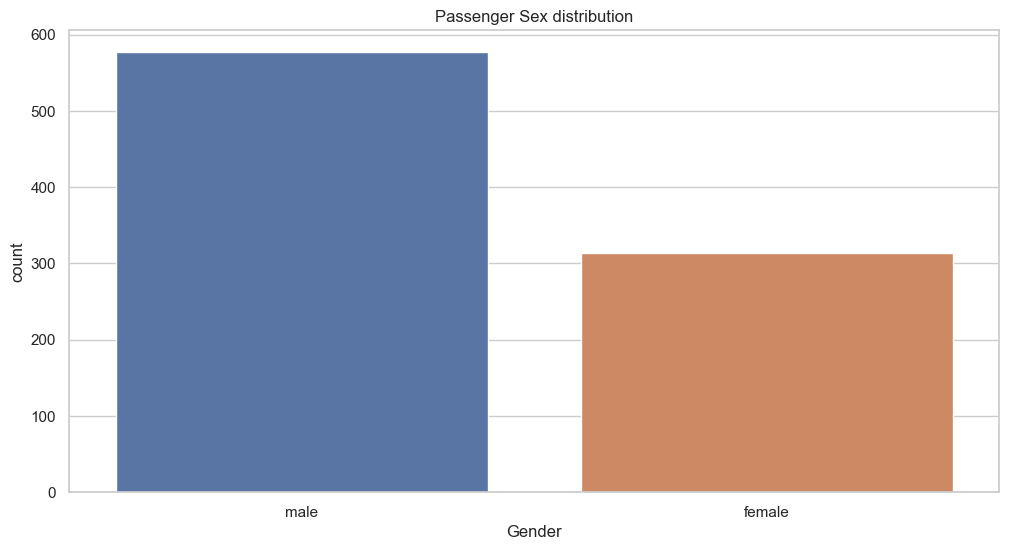

In [262]:
sns.countplot(x='Sex',data=df)
plt.title('Passenger Sex distribution')
plt.xlabel('Gender')
plt.show()

#### Insight:
Male passengers were more in number compared to female passengers on the Titanic, indicating a gender imbalance among travelers.

#### Age distribution

Text(0.5, 0, 'Age')

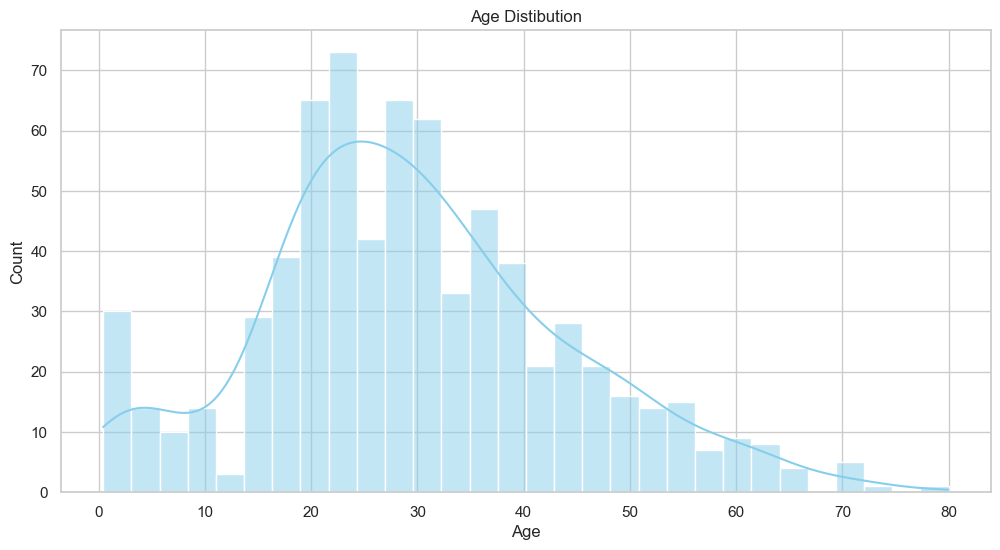

In [268]:
sns.histplot(df['Age'],bins=30,kde=True,color='skyblue')
plt.title('Age Distibution')
plt.xlabel('Age')

#### Insight:
The age distribution is right-skewed, with most passengers between 20 and 40 years old. There are fewer elderly passengers compared to younger adults.

#### Pclass distribution

Let's plot a bar graph for Pclass vs Survived

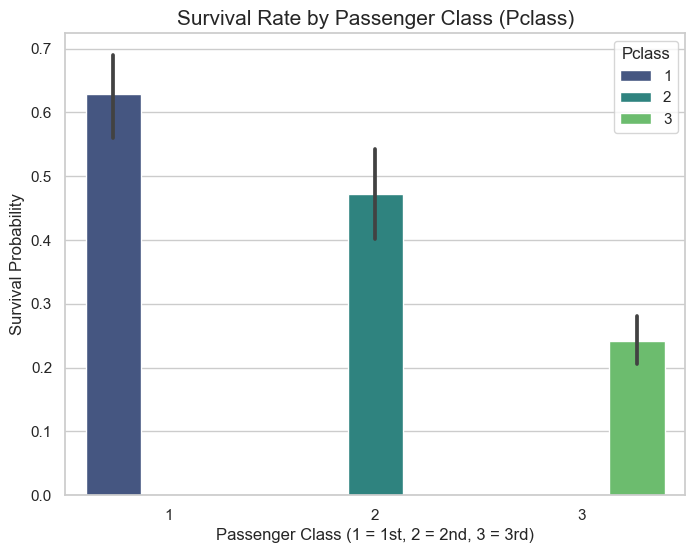

In [247]:
# Setting the aesthetic style
sns.set_theme(style="whitegrid")

# Create the bar plot
plt.figure(figsize=(8, 6))
plot = sns.barplot(x='Pclass', y='Survived', data=df, palette='viridis', hue='Pclass')

# Adding titles and labels
plt.title('Survival Rate by Passenger Class (Pclass)', fontsize=15)
plt.xlabel('Passenger Class (1 = 1st, 2 = 2nd, 3 = 3rd)', fontsize=12)
plt.ylabel('Survival Probability', fontsize=12)

# Show the plot
plt.show()

#### Insight:
Most passengers belonged to the 3rd class, followed by 1st and 2nd class. This suggests that the majority of travelers were from lower socioeconomic backgrounds.

### 6.2 Bivariate Analysis

#### Survival by Sex

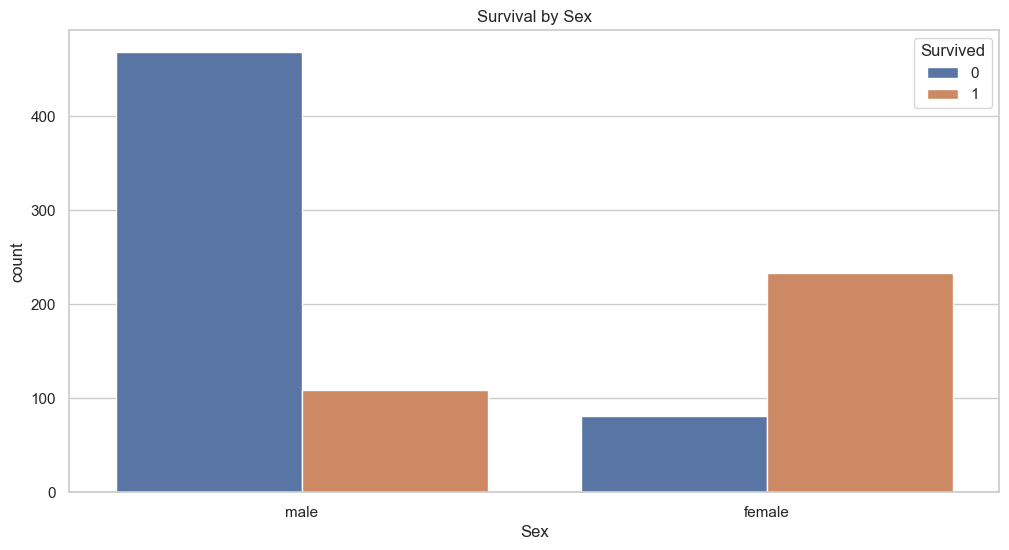

In [273]:
sns.countplot(x='Sex',hue='Survived',data=df)
plt.title('Survival by Sex')
plt.xlabel('Sex')
plt.show()

#### Insight:
Female passengers had a much higher survival rate compared to male passengers. This supports the historical rule of “women first” during evacuation

#### Survival by Pclass

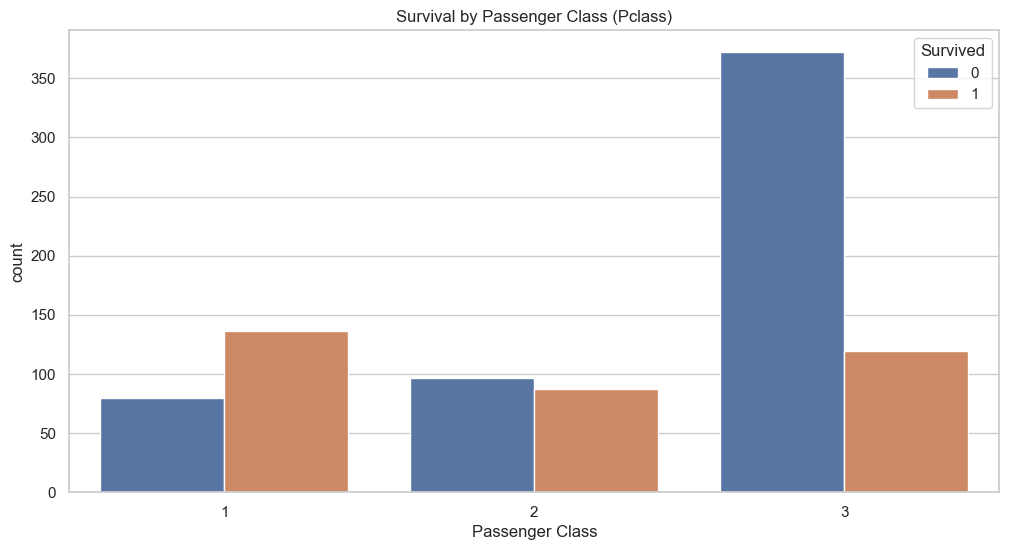

In [275]:
sns.countplot(x='Pclass',hue='Survived',data=df)
plt.title('Survival by Passenger Class (Pclass)')
plt.xlabel('Passenger Class')
plt.show()

#### Insight:
Survival probability was highest for 1st class passengers and lowest for 3rd class passengers, indicating that passenger class played a major role in survival chances.

* This bar graph clearly resonates with our correlation insights

Let's plot the bar graph for Survived vs Sex, filtering by Pclass

#### Survival by Gender

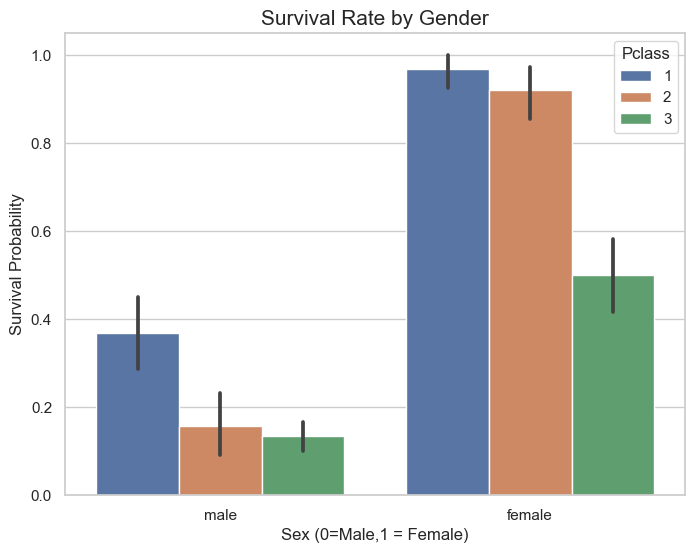

In [248]:
# Setting the aesthetic style
sns.set_theme(style="whitegrid")

# Create the bar plot
plt.figure(figsize=(8, 6))
plot = sns.barplot(x='Sex', y='Survived', data=df, hue='Pclass')

# Adding titles and labels
plt.title('Survival Rate by Gender', fontsize=15)
plt.xlabel('Sex (0=Male,1 = Female)', fontsize=12)
plt.ylabel('Survival Probability', fontsize=12)

# Show the plot
plt.show()

### This further confirms our insights and adds a critical observation to our insights

* Passenger class (1st) was given priority in the rescue operation
* Females were given higher priority irrespective of Passenger Class
* We can notice that males of 1st passenger class had significantly higher probability of survival compared to males of other classes

Overall Females were given priority in rescue operation but 3rd class females had lower survival rate compared to females of 1st and 2nd Class

#### Survival by Embarked

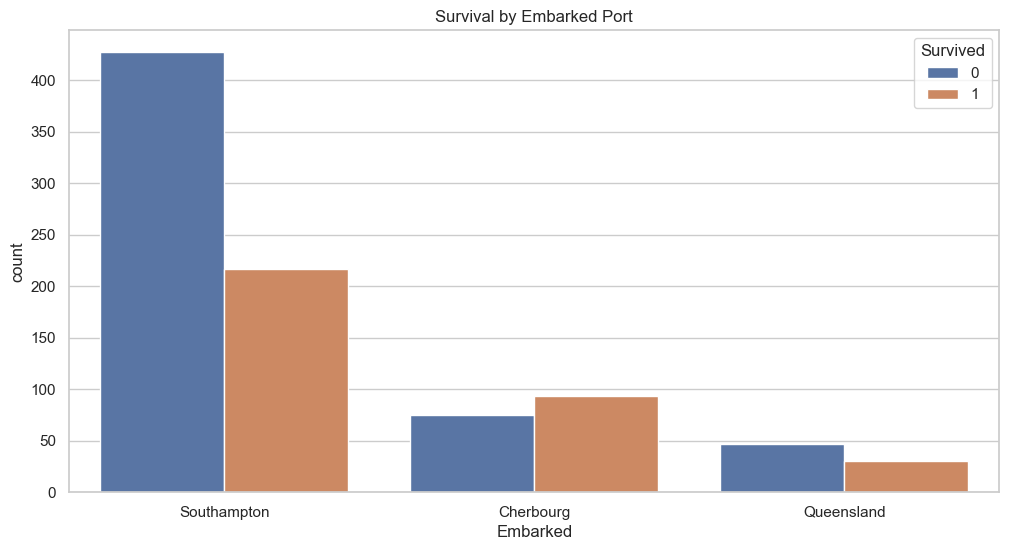

In [246]:
sns.countplot(x='Embarked',hue='Survived',data=df)

new_labels = ['Southampton', 'Cherbourg', 'Queensland']
plt.gca().set_xticklabels(new_labels)

plt.title('Survival by Embarked Port')
plt.xlabel('Embarked')
plt.show()

#### Insight:
Passengers who embarked from Cherbourg had a slightly higher survival rate compared to those from Southampton and Queenstown.

#### Age vs. Survival

Boxplot

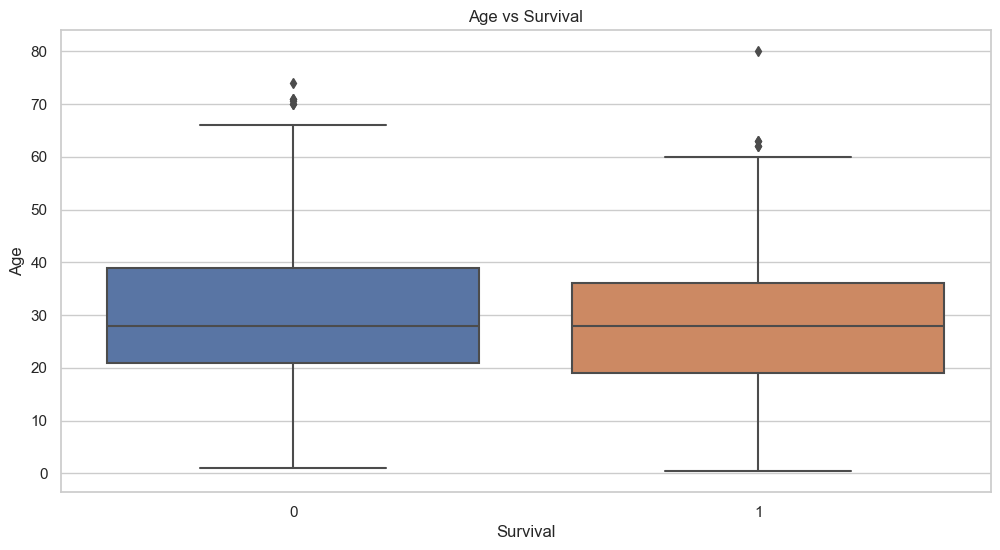

In [279]:
sns.boxplot(x='Survived', y='Age', data=df)
plt.title('Age vs Survival')
plt.xlabel('Survival')
plt.show()

#### Insight:

The median age of survivors is lower than that of non-survivors, indicating that younger passengers had better chances of survival.

#### Fare vs. Survival

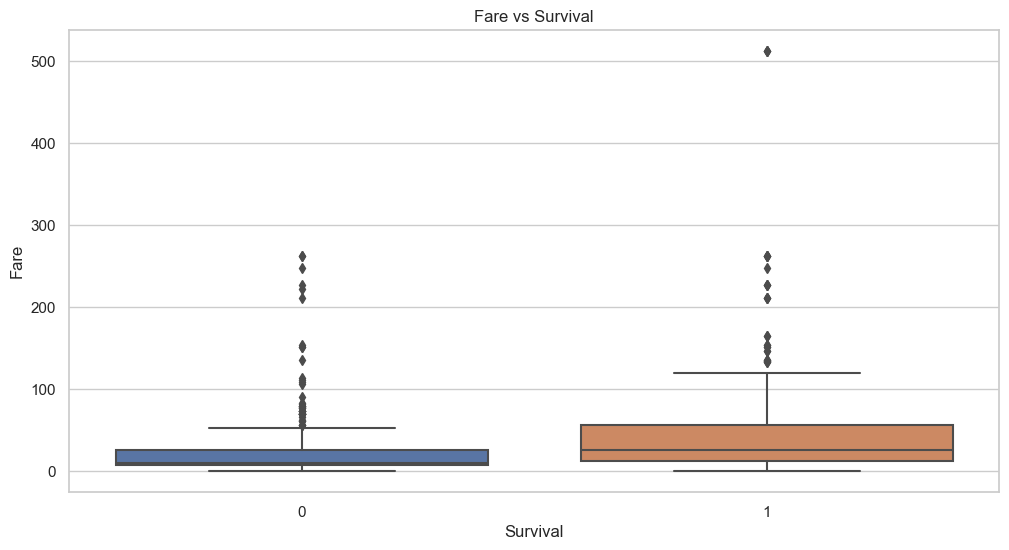

In [282]:
sns.boxplot(x='Survived', y='Fare', data=df)
plt.title('Fare vs Survival')
plt.xlabel('Survival')
plt.show()

#### Insight:

Passengers who survived generally paid higher fares compared to non-survivors, suggesting that wealthier passengers had higher survival chances.

### 4.3 Multivariate Analysis

Survival by Sex and Pclass

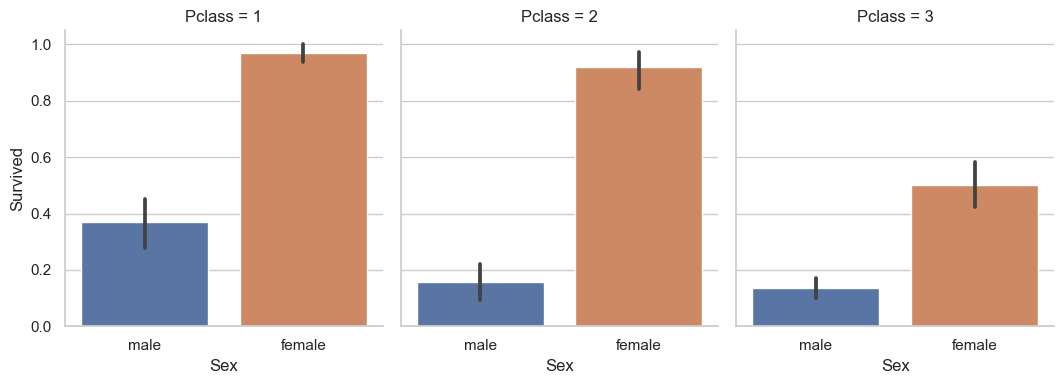

In [285]:
sns.catplot(data=df,x='Sex',y='Survived',col='Pclass',
            kind='bar',height=4,aspect=0.9)
plt.show()

#### Insight:
Female passengers had higher survival rates across all passenger classes. First-class females showed the highest survival probability, while third-class males had the lowest.

#### Survival by Pclass and Embarked

<Figure size 800x400 with 0 Axes>

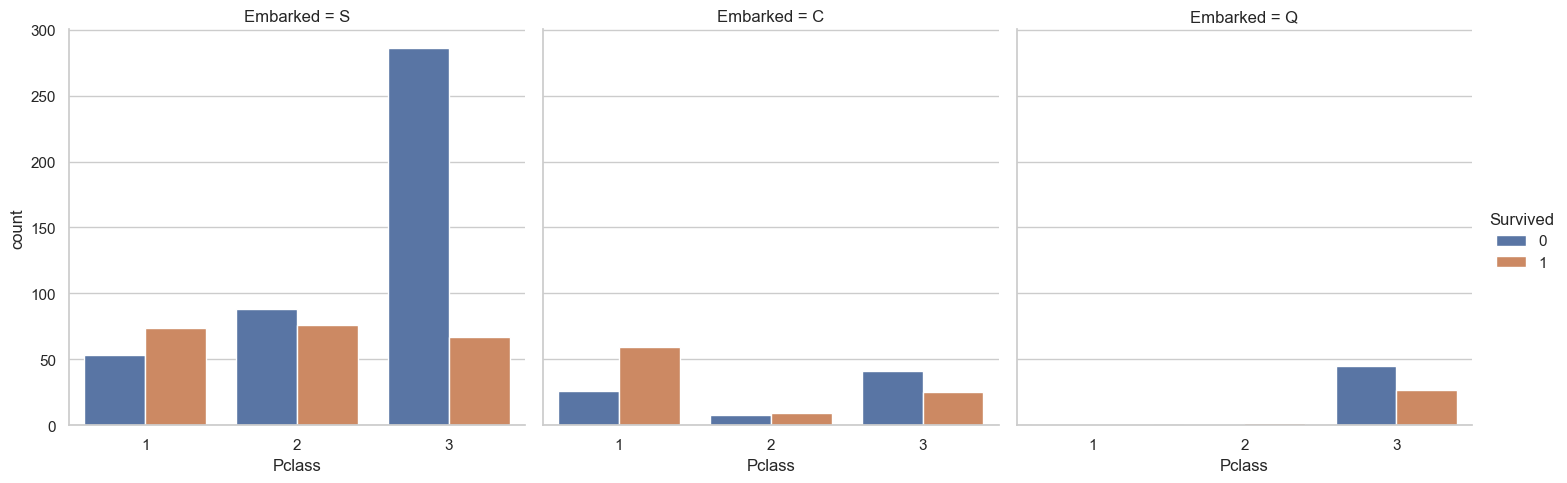

In [287]:
plt.figure(figsize=(8,4))
sns.catplot(x='Pclass',hue='Survived',col='Embarked',kind='count',data=df)
plt.show()

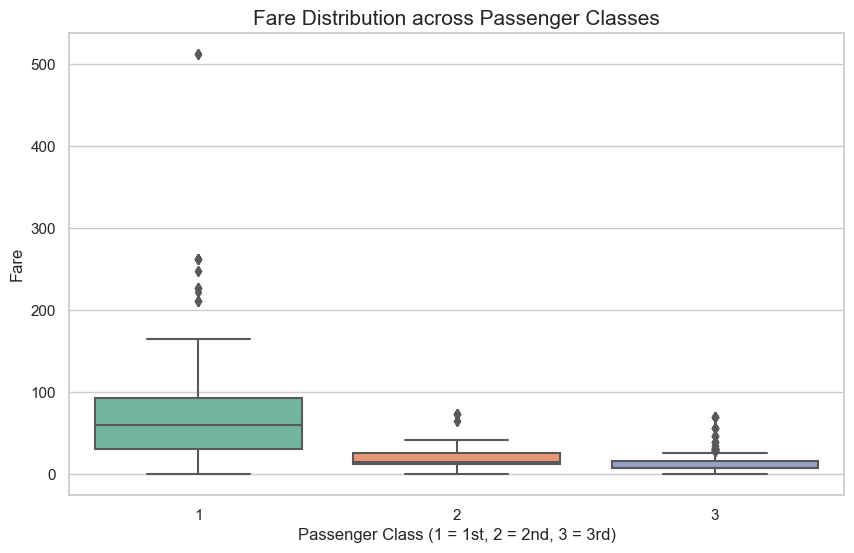

In [250]:
plt.figure(figsize=(10, 6))

sns.boxplot(x='Pclass', y='Fare', data=df, palette='Set2')

plt.title('Fare Distribution across Passenger Classes', fontsize=15)
plt.xlabel('Passenger Class (1 = 1st, 2 = 2nd, 3 = 3rd)', fontsize=12)
plt.ylabel('Fare', fontsize=12)

plt.show()

Let's check the distribution of Age groups in various passenger classes

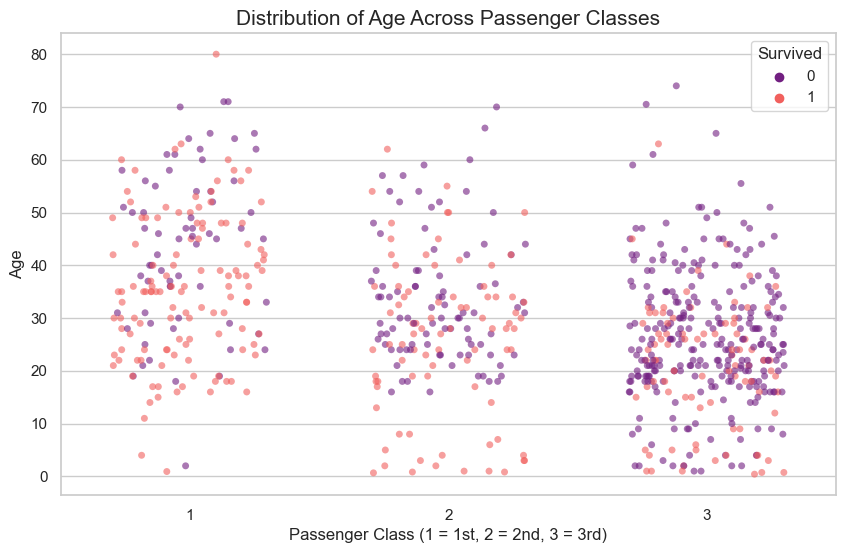

In [249]:
plt.figure(figsize=(10, 6))

# Using stripplot to add 'jitter' so points don't overlap in straight lines
sns.stripplot(x='Pclass', y='Age', data=df, 
              jitter=0.3, size=5, alpha=0.6, palette='magma', hue='Survived')

# Adding titles and labels
plt.title('Distribution of Age Across Passenger Classes', fontsize=15)
plt.xlabel('Passenger Class (1 = 1st, 2 = 2nd, 3 = 3rd)', fontsize=12)
plt.ylabel('Age', fontsize=12)

plt.show()

#### Key Insights:

* We can note that senior citizens 60+ Age, were more concentrated in 1st class
* We can note a significant concentration of Age group 20-30 in 3rd class
* 1st class and 2nd class shows significantly more surival rates compared to 3rd class
* 3rd class clearly shows higher death rate

Let's use Box plot to check for outliers and distribution of Fare across Pclass

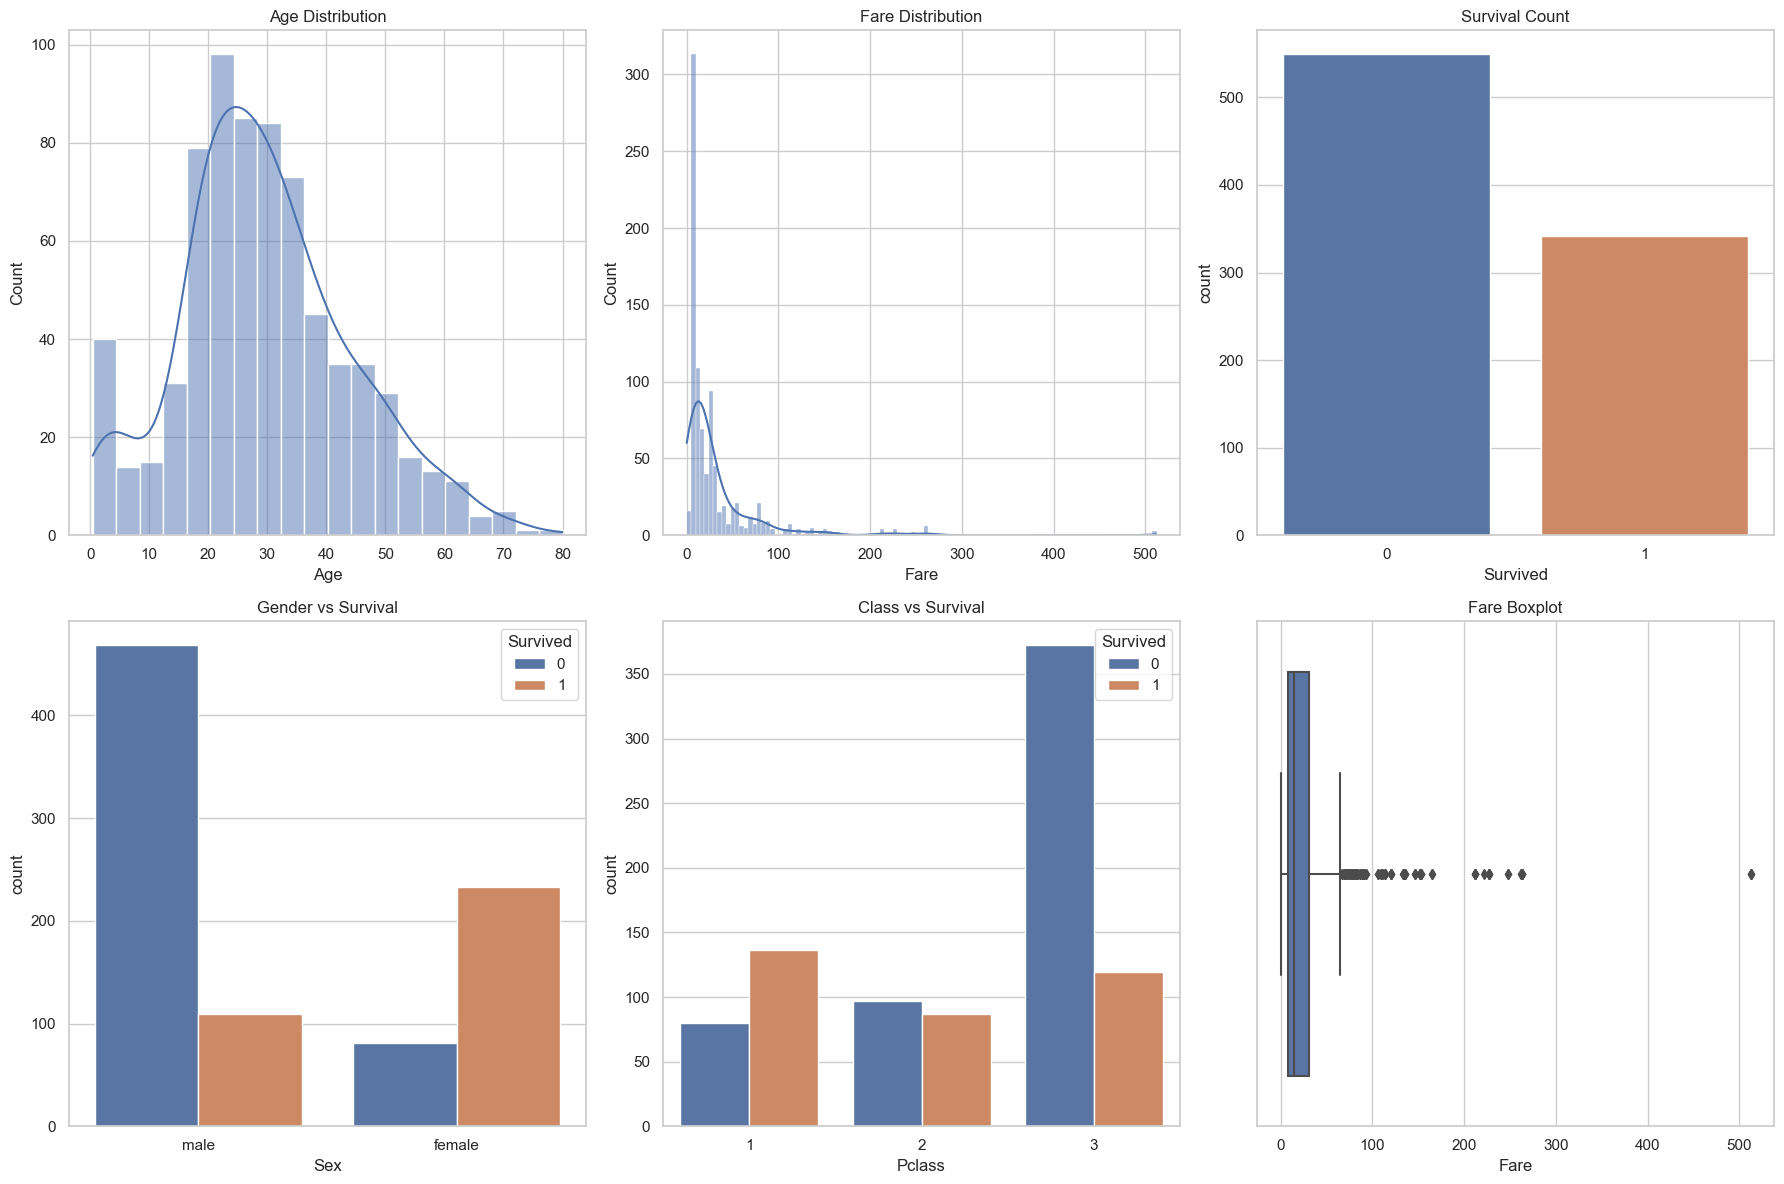

In [244]:
fig, axes = plt.subplots(2, 3, figsize=(18, 12))

# 1. Age Distribution
sns.histplot(df['Age'], kde=True, ax=axes[0, 0])
axes[0, 0].set_title("Age Distribution")

# 2. Fare Distribution
sns.histplot(df['Fare'], kde=True, ax=axes[0, 1])
axes[0, 1].set_title("Fare Distribution")

# 3. Survival Count
sns.countplot(x='Survived', data=df, ax=axes[0, 2])
axes[0, 2].set_title("Survival Count")

# 4. Gender vs Survival
sns.countplot(x='Sex', hue='Survived', data=df, ax=axes[1, 0])
axes[1, 0].set_title("Gender vs Survival")

# 5. Pclass vs Survival
sns.countplot(x='Pclass', hue='Survived', data=df, ax=axes[1, 1])
axes[1, 1].set_title("Class vs Survival")

# 6. Boxplot of Fare
sns.boxplot(x=df['Fare'], ax=axes[1, 2])
axes[1, 2].set_title("Fare Boxplot")

plt.tight_layout()
plt.show()

As noted earlier, The boxplot shows a significant outlier, a Fare above 500 i.e 512 
=> We can also notice that Passengers of 1st Pclass paid much higher than 2nd and 3rd Pclass, probably double or triple the avg fare in 2nd and 3rd Pclass

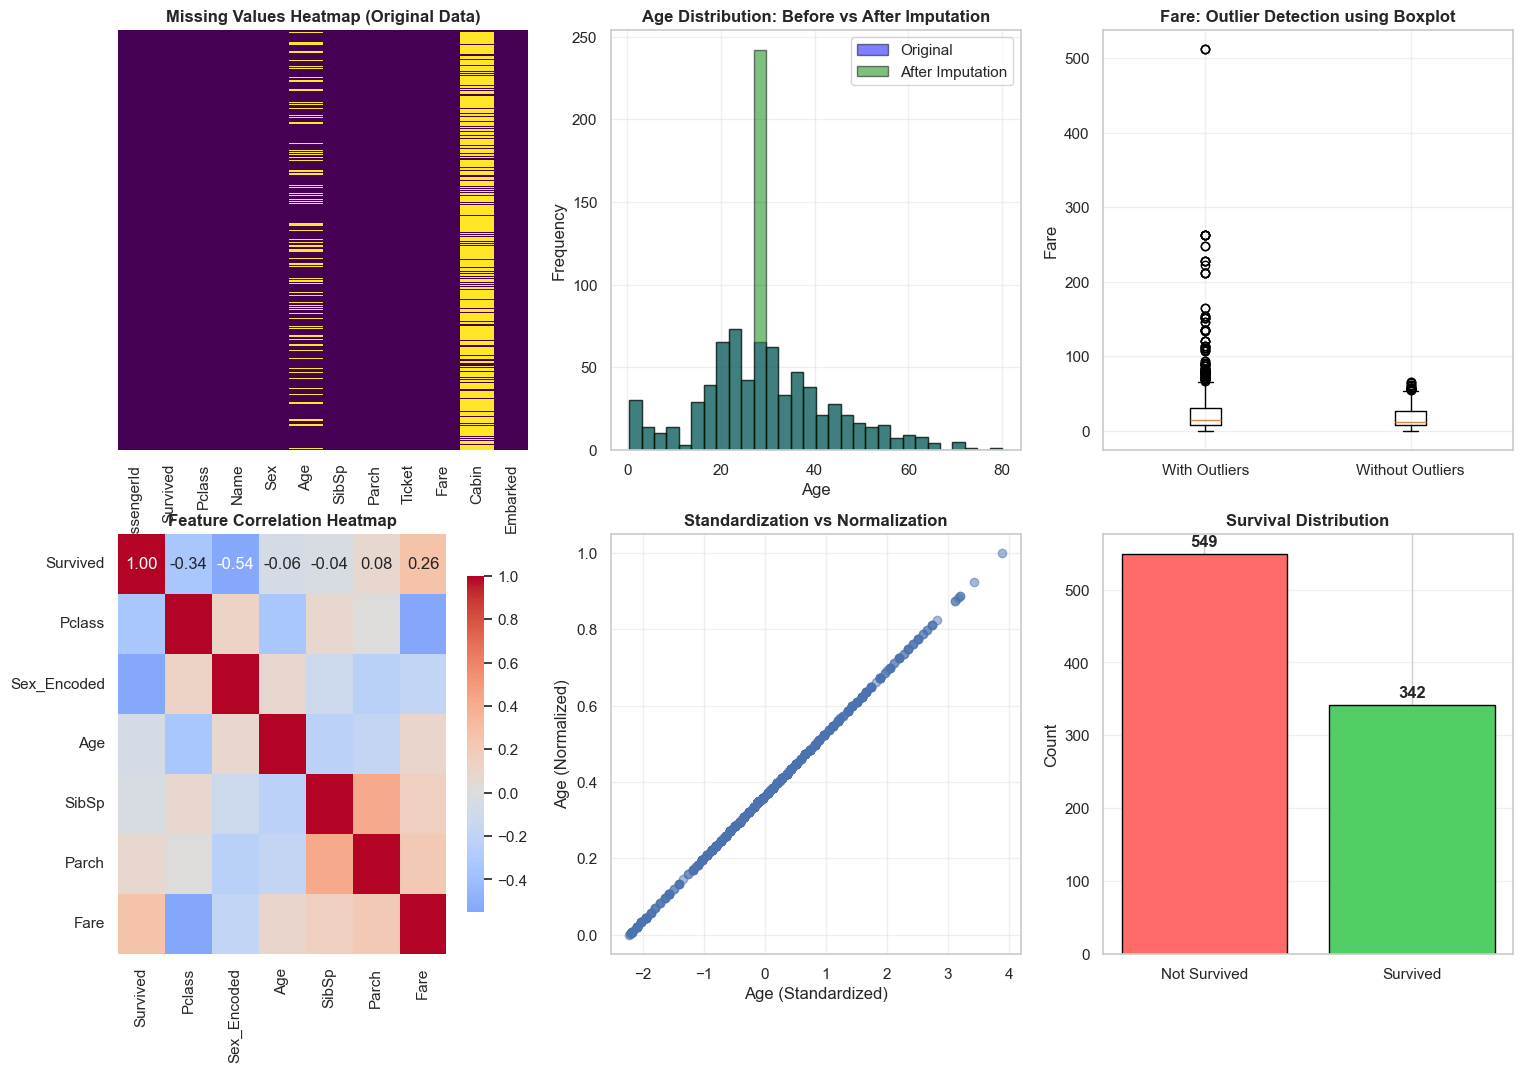

In [251]:
# Create Comparision visualizations

fig, axes = plt.subplots(2, 3, figsize=(18, 12))

# 6.1 Missing values heatmap (original data)
ax1 = axes[0, 0]
sns.heatmap(df.isnull(), cbar=False, yticklabels=False, cmap='viridis', ax=ax1)
ax1.set_title('Missing Values Heatmap (Original Data)', fontsize=12, fontweight='bold')

# 6.2 Age distribution before and after imputation
ax2 = axes[0, 1]
ax2.hist(df['Age'].dropna(), bins=30, alpha=0.5, label='Original', color='blue', edgecolor='black')
ax2.hist(df_processed['Age'], bins=30, alpha=0.5, label='After Imputation', color='green', edgecolor='black')
ax2.set_xlabel('Age')
ax2.set_ylabel('Frequency')
ax2.set_title('Age Distribution: Before vs After Imputation', fontsize=12, fontweight='bold')
ax2.legend()
ax2.grid(True, alpha=0.3)

# 6.3 Boxplot for outlier detection (Fare)
ax3 = axes[0, 2]
ax3.boxplot([df_processed['Fare'], df_no_outliers['Fare']], 
            labels=['With Outliers', 'Without Outliers'])
ax3.set_ylabel('Fare')
ax3.set_title('Fare: Outlier Detection using Boxplot', fontsize=12, fontweight='bold')
ax3.grid(True, alpha=0.3)

# 6.4 Correlation heatmap
ax4 = axes[1, 0]
correlation_cols = ['Survived', 'Pclass', 'Sex_Encoded', 'Age', 'SibSp', 'Parch', 'Fare']
correlation_matrix = df_processed[correlation_cols].corr()
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', center=0, ax=ax4, cbar_kws={'shrink': 0.8})
ax4.set_title('Feature Correlation Heatmap', fontsize=12, fontweight='bold')

# 6.5 Standardization vs Normalization comparison
ax5 = axes[1, 1]
ax5.scatter(df_processed['Age_Standardized'], df_processed['Age_Normalized'], alpha=0.5)
ax5.set_xlabel('Age (Standardized)')
ax5.set_ylabel('Age (Normalized)')
ax5.set_title('Standardization vs Normalization', fontsize=12, fontweight='bold')
ax5.grid(True, alpha=0.3)

# 6.6 Class distribution
ax6 = axes[1, 2]
survival_counts = df_processed['Survived'].value_counts()
ax6.bar(['Not Survived', 'Survived'], survival_counts.values, color=['#ff6b6b', '#51cf66'], edgecolor='black')
ax6.set_ylabel('Count')
ax6.set_title('Survival Distribution', fontsize=12, fontweight='bold')
ax6.grid(True, alpha=0.3, axis='y')
for i, v in enumerate(survival_counts.values):
    ax6.text(i, v + 10, str(v), ha='center', fontweight='bold')

In [252]:
plt.tight_layout()
plt.savefig('preprocessing_visualizations.png', dpi=300, bbox_inches='tight')
print("    ✓ Visualizations saved to 'preprocessing_visualizations.png'")

    ✓ Visualizations saved to 'preprocessing_visualizations.png'


<Figure size 1200x600 with 0 Axes>

### Conclusion

* Survival on the Titanic was highly influenced by gender, with females having significantly higher survival rates than males.
* Passenger class played a major role, as first-class passengers had the highest chances of survival while third-class passengers had the lowest.
* Passengers who paid higher fares were more likely to survive, indicating the impact of socioeconomic status.
* Younger passengers, especially children, showed better survival outcomes compared to older passengers.
* Passengers embarking from Cherbourg had relatively higher survival rates than those from other ports.

Appropriate features for our model can be (In order of importance, Descending):

* Sex
* Pclass
* Fare
* Age

# ============================================================================
# STEP 7: PREPARE FINAL DATASET
# ============================================================================

In [253]:
print("\n\n[STEP 7] Preparing Final Dataset...")
print("-" * 80)



[STEP 7] Preparing Final Dataset...
--------------------------------------------------------------------------------


In [254]:
# Drop unnecessary columns
final_features = [
    'Survived', 'Pclass', 'Sex_Encoded', 'Age', 'SibSp', 'Parch', 'Fare',
    'Embarked_Q', 'Embarked_S', 'Age_Standardized', 'Fare_Standardized'
]

In [190]:
df_final = df_no_outliers[final_features].copy()

In [191]:
print("\n7.1 Final Dataset Shape:", df_final.shape)


7.1 Final Dataset Shape: (721, 11)


In [192]:
print("\n7.2 Final Features:")
print(df_final.columns.tolist())


7.2 Final Features:
['Survived', 'Pclass', 'Sex_Encoded', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked_Q', 'Embarked_S', 'Age_Standardized', 'Fare_Standardized']


In [193]:
print("\n7.3 Final Dataset Preview:")
print(df_final.head(10))


7.3 Final Dataset Preview:
    Survived  Pclass  Sex_Encoded   Age  SibSp  Parch     Fare  Embarked_Q  \
0          0       3            1  22.0      1      0   7.2500       False   
2          1       3            0  26.0      0      0   7.9250       False   
3          1       1            0  35.0      1      0  53.1000       False   
4          0       3            1  35.0      0      0   8.0500       False   
5          0       3            1  28.0      0      0   8.4583        True   
6          0       1            1  54.0      0      0  51.8625       False   
8          1       3            0  27.0      0      2  11.1333       False   
9          1       2            0  14.0      1      0  30.0708       False   
10         1       3            0   4.0      1      1  16.7000       False   
12         0       3            1  20.0      0      0   8.0500       False   

    Embarked_S  Age_Standardized  Fare_Standardized  
0         True         -0.565736          -0.502445  
2    

In [194]:
print("\n7.4 Final Dataset Statistics:")
print(df_final.describe())


7.4 Final Dataset Statistics:
         Survived      Pclass  Sex_Encoded         Age       SibSp  \
count  721.000000  721.000000   721.000000  721.000000  721.000000   
mean     0.337032    2.509015     0.679612   28.094313    0.414702   
std      0.473024    0.717046     0.466950   10.021961    0.853916   
min      0.000000    1.000000     0.000000    3.000000    0.000000   
25%      0.000000    2.000000     0.000000   22.000000    0.000000   
50%      0.000000    3.000000     1.000000   28.000000    0.000000   
75%      1.000000    3.000000     1.000000   33.000000    1.000000   
max      1.000000    3.000000     1.000000   54.000000    5.000000   

            Parch        Fare  Age_Standardized  Fare_Standardized  
count  721.000000  721.000000        721.000000         721.000000  
mean     0.323162   17.389845         -0.097389          -0.298283  
std      0.788549   13.563036          0.770186           0.273087  
min      0.000000    0.000000         -2.025883          -0.64

In [195]:
# Save the cleaned dataset
df_final.to_csv('titanic_cleaned.csv', index=False)
print("\n7.5 ✓ Cleaned dataset saved to 'titanic_cleaned.csv'")


7.5 ✓ Cleaned dataset saved to 'titanic_cleaned.csv'


# ============================================================================
# SUMMARY
# ============================================================================

In [196]:
print("\n\n" + "=" * 80)
print("PREPROCESSING SUMMARY")
print("=" * 80)



PREPROCESSING SUMMARY


In [197]:
print(f"""
Original Dataset:
  - Rows: {df.shape[0]}
  - Columns: {df.shape[1]}
  - Missing Values: {df.isnull().sum().sum()}

Final Dataset:
  - Rows: {df_final.shape[0]} ({(df_final.shape[0]/df.shape[0]*100):.1f}% retained)
  - Columns: {df_final.shape[1]}
  - Missing Values: {df_final.isnull().sum().sum()}

Steps Completed:
  ✓ Data exploration and profiling
  ✓ Missing value handling (imputation)
  ✓ Categorical encoding (Label & One-Hot)
  ✓ Feature scaling (Standardization & Normalization)
  ✓ Outlier detection and removal
  ✓ Data visualization
  ✓ Final dataset preparation

Output Files:
  1. titanic_cleaned.csv - Cleaned dataset
  2. preprocessing_visualizations.png - Visual analysis
  3. data_preprocessing.py - Complete pipeline code
""")



Original Dataset:
  - Rows: 891
  - Columns: 12
  - Missing Values: 866

Final Dataset:
  - Rows: 721 (80.9% retained)
  - Columns: 11
  - Missing Values: 0

Steps Completed:
  ✓ Data exploration and profiling
  ✓ Missing value handling (imputation)
  ✓ Categorical encoding (Label & One-Hot)
  ✓ Feature scaling (Standardization & Normalization)
  ✓ Outlier detection and removal
  ✓ Data visualization
  ✓ Final dataset preparation

Output Files:
  1. titanic_cleaned.csv - Cleaned dataset
  2. preprocessing_visualizations.png - Visual analysis
  3. data_preprocessing.py - Complete pipeline code



In [198]:
print("=" * 80)
print("PREPROCESSING COMPLETED SUCCESSFULLY!")
print("=" * 80)

PREPROCESSING COMPLETED SUCCESSFULLY!
